# Exploratory Data Analysis
***
<b>Content</b>
- [1. Importing of Data as a DataFrame](#1.-Importing-of-Data-as-a-DataFrame)
- [2. Removing Duplicate Rows](#2.-Removing-Duplicate-Rows)
- [3. Converting to a Binary Classification Problem](#3.-Converting-to-a-Binary-Classification-Problem)
- [4. Feature Engineering](#4.-Feature-Engineering)
    - [4a. Processing the 'Model' column](#4a.-Processing-the-'Model'-column)
    - [4b. Processing the 'Color' column](#4b.-Processing-the-'Color'-column)
    - [4c. Processing the 'Temperature' column](#4c.-Processing-the-'Temperature'-column)
    - [4d. Processing the 'Factory' column](#4d.-Processing-the-'Factory'-column)
    - [4e. Processing the 'Usage' column](#4e.-Processing-the-'Usage'-column)
    - [4f. Processing the 'Membership' column](#4f.-Processing-the-'Membership'-column)
    - [4g. Rearrangement of columns](#4g.-Rearrangement-of-columns)
- [5. Statstical Analysis of the Continuous Variables](#5.-Statstical-Analysis-of-the-Continuous-Variables)
    - [5a. RPM](#5a.-RPM)
    - [5b. Temperature_Celsius](#5b.-Temperature_Celsius)
    - [5c. Fuel consumption](#5c.-Fuel-consumption)
- [6. Principal Component Analysis (PCA)](#6.-Principal-Component-Analysis-(PCA))

## 1. Importing of Data as a DataFrame


I first import all the necessary packages.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from pandas import read_sql_query, read_sql_table
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

I then convert the database into a dataframe.

In [2]:
with sqlite3.connect('data/failure.db') as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name']) 

tables

['failure']

In [3]:
with sqlite3.connect('data/failure.db') as dbcon:
    df = pd.read_sql_query("SELECT * FROM failure", dbcon)
    
df.head(10)

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0
5,3b5e4310-9f3f-4c4d-92c3-ec09fa36f772,"Model 5, 2021",White,110.3 °C,1425,"Shang Hai, China",Medium,691.8,Premium,0,0,0,0,0
6,6758d615-185a-4ad3-b9a5-d5b4ebf9e933,"Model 3, 2021",White,110.3 °C,1558,"Shang Hai, China",Medium,660.1,Premium,0,0,0,0,0
7,ee7d677a-8f65-4773-a158-e59843ae8109,"Model 3, 2021",White,110.3 °C,1527,"Berlin, Germany",Medium,673.0,Premium,0,0,0,0,0
8,bcac8a8b-fb2c-43d9-aa80-193421f70e36,"Model 5, 2021",Red,110.4 °C,1667,"Shang Hai, China",Medium,655.6,Normal,0,0,0,0,0
9,fef5d386-9636-4a63-8a39-67bd005be989,"Model 5, 2021",Black,110.4 °C,1741,"Berlin, Germany",Medium,648.9,Normal,0,0,0,0,0


There are 10081 rows and 14 columns.

In [4]:
df.shape

(10081, 14)

From the information, I see that there are missing values in the column 'Membership'.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


## 2. Removing Duplicate Rows


I see that there are 162 rows of duplicated rows based on the car ID!

In [6]:
duplicates = df.duplicated(subset = 'Car ID', keep = False)
df[duplicates].sort_values(by = 'Car ID')

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
10046,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
66,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
98,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10006,0d510f67-2238-4de0-9ac9-1e5a8e345622,"Model 3, 2018",Red,110.7 °C,1512,"Berlin, Germany",Low,601.2,Premium,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,f5d387f3-b41f-457a-9ae8-1f77e3eafbcb,"Model 3, 2014",White,110.6 °C,1393,"Berlin, Germany",Low,614.8,Normal,0,0,0,0,0
20,fb6b1d49-ed23-42f2-8e39-292e568f517d,"Model 7, 2019",White,110.6 °C,1375,"Shang Hai, China",High,753.5,Normal,0,0,0,0,0
10000,fb6b1d49-ed23-42f2-8e39-292e568f517d,"Model 7, 2019",White,110.6 °C,1375,"Shang Hai, China",High,753.5,Normal,0,0,0,0,0
99,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,"Model 3, 2019",Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,0,0,0,0


Let's remove the duplicates and check to see if it works!

In [7]:
df.drop_duplicates(subset = 'Car ID', inplace = True)
duplicates = df.duplicated(subset = 'Car ID', keep = False)
df[duplicates].sort_values(by = 'Car ID')

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E


Now there are 10000 unique rows of data with missing values in 'Membership'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10000 non-null  object 
 1   Model             10000 non-null  object 
 2   Color             10000 non-null  object 
 3   Temperature       10000 non-null  object 
 4   RPM               10000 non-null  int64  
 5   Factory           10000 non-null  object 
 6   Usage             10000 non-null  object 
 7   Fuel consumption  10000 non-null  float64
 8   Membership        9617 non-null   object 
 9   Failure A         10000 non-null  int64  
 10  Failure B         10000 non-null  int64  
 11  Failure C         10000 non-null  int64  
 12  Failure D         10000 non-null  int64  
 13  Failure E         10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


Since there are no other uses for 'Car ID', I will drop it.

In [9]:
df.drop('Car ID', axis = 1, inplace = True)

## 3. Converting to a Binary Classification Problem

I first observed that each car only has only 1 type of failure.

In [10]:
target_columns = ["Failure A", "Failure B", "Failure C", "Failure D", "Failure E"]
df[df[target_columns].sum(axis = 1) > 1]

,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E


In [11]:
df[target_columns].sum()

Failure A    259
Failure B    185
Failure C    310
Failure D    244
Failure E    264
dtype: int64

In [12]:
print(f'Number of cars with failures is {df[target_columns].sum().sum()}')

Number of cars with failures is 1262


Each of the failure category forms a proportion of 1-3% of the dataset, which means the dataset is imbalanced if we choose to work on this problem as a multi-class classification problem (encode such that Failure A will be type 1, Failure B will be type 2 and so on. Cars with no failures will be labelled 0).

Two workarounds:
1. I will need to perform specialized techniques to change the composition of samples in the training dataset by undersampling the majority class or oversampling the minority class, such as Random Undersampling or SMOTE Oversampling.

2. I can combine the columns in the target_columns to just one as 'Failure', 0 for no failure, 1 for having a failure.


I will choose to go for the second approach (i.e. convert the problem to a binary classification problem) for two reasons:

1. It was stated in the problem statement is that my objective is to predict the occurrence of car failure, and did not specify that I had to predict the occurence of type of car failure. From the automotive company's standpoint, they will be more interested in whether the car has a failure than the specific type of failure itself.

2. The sample size for each of the failure categories is too small as compared to the overall sample size.

As such I will go for the latter approach and convert this problem to a binary classification problem.

In [13]:
df['Failure'] = 0

for i in range(5):
    df.loc[df[target_columns[i]] == 1, 'Failure'] = 1

Verify that I did my conversion correctly:

In [14]:
df['Failure'].value_counts().sort_index()

0    8738
1    1262
Name: Failure, dtype: int64

I will now drop the original target columns and convert 'Failure Type' to category.

In [15]:
df.drop(target_columns, axis = 1, inplace = True)
df['Failure'] = df['Failure'].astype('category')
df.head(10)

,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure
0,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0
1,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1
2,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0
3,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1
4,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,1
5,"Model 5, 2021",White,110.3 °C,1425,"Shang Hai, China",Medium,691.8,Premium,0
6,"Model 3, 2021",White,110.3 °C,1558,"Shang Hai, China",Medium,660.1,Premium,0
7,"Model 3, 2021",White,110.3 °C,1527,"Berlin, Germany",Medium,673.0,Premium,0
8,"Model 5, 2021",Red,110.4 °C,1667,"Shang Hai, China",Medium,655.6,Normal,0
9,"Model 5, 2021",Black,110.4 °C,1741,"Berlin, Germany",Medium,648.9,Normal,0


## 4. Feature Engineering

## 4a. Processing the 'Model' column

Let's explore the 'Model' column.

In [16]:
df['Model'].unique()

array(['Model 5, 2022', 'Model 3, 2022', 'Model 5, 2021', 'Model 3, 2021',
       'Model 7, 2021', 'Model 5, 2020', 'Model 3, 2020', 'Model 7, 2020',
       'Model 5, 2019', 'Model 7, 2019', 'Model 3, 2019', 'Model 5, 2018',
       'Model 3, 2018', 'Model 7, 2018', 'Model 3, 2017', 'Model 5, 2017',
       'Model 7, 2017', 'Model 3, 2016', 'Model 5, 2016', 'Model 7, 2016',
       'Model 3, 2015', 'Model 7, 2015', 'Model 5, 2015', 'Model 3, 2014',
       'Model 5, 2014', 'Model 3, 2013', 'Model 5, 2013', 'Model 7, 2013',
       'Model 3, 2012', 'Model 5, 2012', 'Model 7, 2022', 'Model 7, 2014',
       'Model 7, 2012', 'Model 5, 2011', 'Model 3, 2011', 'Model 7, 2011',
       'Model 3, 2010', 'Model 7, 2010', 'Model 5, 2010', 'Model 3, 2009',
       'Model 5, 2009'], dtype=object)

It seems that the 'Model' column combines both the model number and the year. I will extract both information as separate columns and remove the word 'Model'. 

I will map the model numbers to integers (3 to 0, 5 to 1 and 7 to 2) as it is an ordinal variable measuring the amount of specifications.

I will also use the year to create a column 'Years in market' to measure how old the model is.

In [17]:
df[['Model No', 'Model Year']] = df['Model'].str.split(', ', expand = True)

df['Model No'] = df['Model No'].str[-1:].astype('int16')

encoder = ce.OrdinalEncoder(cols = ['Model No'],
                           return_df = True,
                           mapping = [{'col': 'Model No', 
                                       'mapping':{3: 0, 5: 1, 7: 2}}])

df['Model No'] = encoder.fit_transform(df['Model No']).astype('int8')

df['Years in Market'] = 2023 - df['Model Year'].astype('int16')
df.drop(['Model', 'Model Year'], axis = 1, inplace = True)

df.head(10)

,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure,Model No,Years in Market
0,Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,1,1
1,Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,1
2,Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,1
3,Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,1
4,White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,1,0,1
5,White,110.3 °C,1425,"Shang Hai, China",Medium,691.8,Premium,0,1,2
6,White,110.3 °C,1558,"Shang Hai, China",Medium,660.1,Premium,0,0,2
7,White,110.3 °C,1527,"Berlin, Germany",Medium,673.0,Premium,0,0,2
8,Red,110.4 °C,1667,"Shang Hai, China",Medium,655.6,Normal,0,1,2
9,Black,110.4 °C,1741,"Berlin, Germany",Medium,648.9,Normal,0,1,2


Let us now examine whether there is any relationship between model number and occurrence of failure.

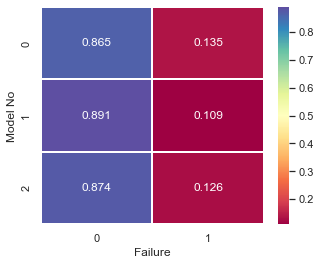

In [18]:
pair = pd.crosstab(df['Model No'], df['Failure'], normalize = 'index')

sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

sns.heatmap(pair, 
            cmap = "Spectral",  
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')
plt.show()

It seems that there is no significance difference in the failure rate across the three different models. How about years in market?

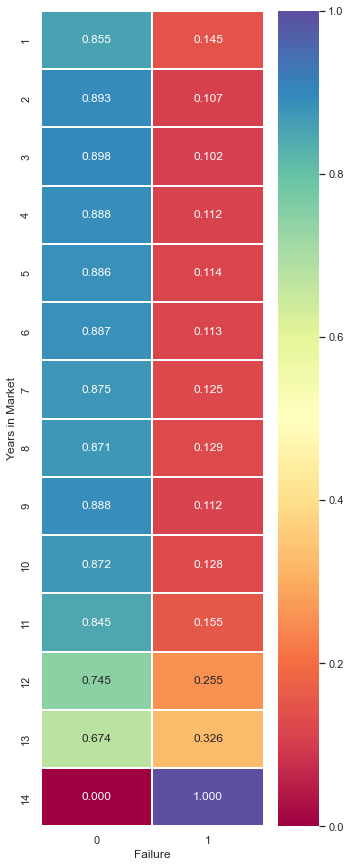

In [19]:
pair = pd.crosstab(df['Years in Market'], df['Failure'], normalize = 'index')

fig, ax = plt.subplots()
fig.set_size_inches(5, 15)

sns.heatmap(pair, 
            cmap = "Spectral",  
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')
plt.show()

It is interesting to note that cars with at least 12 years in the market (i.e. those produced in and before 2011) have quite a high chance to fail.

## 4b. Processing the 'Color' column

I will now explore the 'Color' column and perform label encoding. Will need to change its datatype to category.

In [20]:
df['Color'].value_counts().sort_index()

Black    1058
Blue     1129
Grey     1086
Red      1159
White    5568
Name: Color, dtype: int64

In [21]:
encoder = ce.OrdinalEncoder(cols = ['Color'],
                           return_df = True,
                           mapping = [{'col': 'Color', 
                                       'mapping':{'Black': 0, 
                                                  'Blue': 1,
                                                  'Grey': 2,
                                                  'White': 3,
                                                  'Red': 4}}])

df['Color'] = encoder.fit_transform(df['Color'])

df['Color'] = df['Color'].astype('category')

df['Color'].value_counts().sort_index()

0    1058
1    1129
2    1086
3    5568
4    1159
Name: Color, dtype: int64

Let us now examine whether there is any relationship between colour and occurrence of failure.

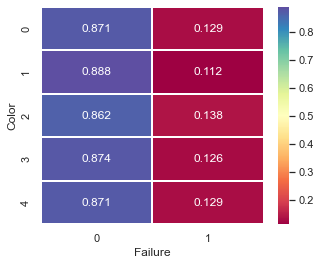

In [22]:
pair = pd.crosstab(df['Color'], df['Failure'], normalize = 'index')

fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

sns.heatmap(pair, 
            cmap = "Spectral",  
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')
plt.show()

## 4c. Processing the 'Temperature' column

I will remove the units in the column 'Temperature' and rename the column as 'Temperature_Celsius' and change it to float type.

In [23]:
df['Temperature'] = df['Temperature'].str[:-3].astype('float')
df.rename({'Temperature': 'Temperature_Celsius'}, axis = 1, inplace = True)

df.head(10)

,Color,Temperature_Celsius,RPM,Factory,Usage,Fuel consumption,Membership,Failure,Model No,Years in Market
0,1,110.3,1551,"Shang Hai, China",Medium,659.7,Normal,0,1,1
1,0,110.4,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,1
2,2,110.3,1498,"Shang Hai, China",Low,670.7,Premium,0,0,1
3,0,110.4,1433,"Berlin, Germany",High,630.6,Premium,1,0,1
4,3,230.7,1408,"New York, U.S",High,660.9,Normal,1,0,1
5,3,110.3,1425,"Shang Hai, China",Medium,691.8,Premium,0,1,2
6,3,110.3,1558,"Shang Hai, China",Medium,660.1,Premium,0,0,2
7,3,110.3,1527,"Berlin, Germany",Medium,673.0,Premium,0,0,2
8,4,110.4,1667,"Shang Hai, China",Medium,655.6,Normal,0,1,2
9,0,110.4,1741,"Berlin, Germany",Medium,648.9,Normal,0,1,2


## 4d. Processing the 'Factory' column

Similarly, the 'Factory' column combines both the state and the country. I will extract both information as separate columns.

In [24]:
df['Factory'].value_counts()

Shang Hai, China    5478
Berlin, Germany     2215
New York, U.S       2127
Seng Kang, China     106
Newton, China         44
Bedok, Germany        30
Name: Factory, dtype: int64

In [25]:
df[['State of Production', 'Country of Production']] = df['Factory'].str.split(', ', expand = True)
df.drop('Factory', axis = 1, inplace = True)
df.head(10)

,Color,Temperature_Celsius,RPM,Usage,Fuel consumption,Membership,Failure,Model No,Years in Market,State of Production,Country of Production
0,1,110.3,1551,Medium,659.7,Normal,0,1,1,Shang Hai,China
1,0,110.4,1408,Medium,705.3,Premium,1,0,1,Shang Hai,China
2,2,110.3,1498,Low,670.7,Premium,0,0,1,Shang Hai,China
3,0,110.4,1433,High,630.6,Premium,1,0,1,Berlin,Germany
4,3,230.7,1408,High,660.9,Normal,1,0,1,New York,U.S
5,3,110.3,1425,Medium,691.8,Premium,0,1,2,Shang Hai,China
6,3,110.3,1558,Medium,660.1,Premium,0,0,2,Shang Hai,China
7,3,110.3,1527,Medium,673.0,Premium,0,0,2,Berlin,Germany
8,4,110.4,1667,Medium,655.6,Normal,0,1,2,Shang Hai,China
9,0,110.4,1741,Medium,648.9,Normal,0,1,2,Berlin,Germany


Let's look at the possible values for 'State of Production' and 'Country of Production'.

In [26]:
df['State of Production'].value_counts()

Shang Hai    5478
Berlin       2215
New York     2127
Seng Kang     106
Newton         44
Bedok          30
Name: State of Production, dtype: int64

In [27]:
df['Country of Production'].value_counts()

China      5628
Germany    2245
U.S        2127
Name: Country of Production, dtype: int64

Something is not quite right with the state values (Seng Kang, Newton and Bedok). Let us examine these strange values.

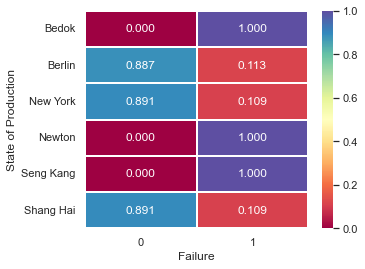

In [28]:
pair = pd.crosstab(df['State of Production'], df['Failure'], normalize = 'index')

fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

sns.heatmap(pair, 
            cmap = "Spectral",  
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')
plt.show()

It seems that cars from these strange states (Bedok, Newton and Seng Kang) are all faulty! Hence the erroneous value itself is a strong indicator for car fault and should not be dropped or imputed. Moreover, those with erroneous state value accounts for 180 out of 1262 cars with failures! This accounts for approximately 14% of the cars with failures which is too significant to drop or place them in any other categories!

It may be indicative that these cars are produced from unauthorised sellers in those countries. Hence, I will penalise these erroneous values with -1 and the rest of the states will be replaced with 0. There is no need to differentiate between the legitimate states as there is one-to-one mapping with the legitimate states and the countries.

In [29]:
encoder = ce.OrdinalEncoder(cols = ['State of Production'],
                            return_df = True,
                            mapping = [{'col': 'State of Production', 
                                        'mapping':{'Shang Hai': 0, 
                                                   'Berlin': 0,
                                                   'New York': 0,
                                                   'Seng Kang': -1,
                                                   'Newton': -1,
                                                   'Bedok': -1}}])

df['State of Production'] = encoder.fit_transform(df['State of Production']).astype('int8')

df['State of Production'].value_counts()

 0    9820
-1     180
Name: State of Production, dtype: int64

I will now perform label encoding on 'Country of Production' and change its datatype to category.

In [30]:
encoder = ce.OrdinalEncoder(cols = ['Country of Production'],
                            return_df = True,
                            mapping = [{'col': 'Country of Production', 
                                        'mapping':{'China': 0,
                                                   'Germany': 1,
                                                   'U.S': 2}}])

df['Country of Production'] = encoder.fit_transform(df['Country of Production'])

df['Country of Production'] = df['Country of Production'].astype('category')

df['Country of Production'].value_counts()

0    5628
1    2245
2    2127
Name: Country of Production, dtype: int64

Let us now examine whether there is any relationship between country of production and occurrence of failure.

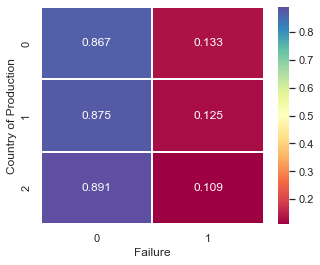

In [31]:
pair = pd.crosstab(df['Country of Production'], df['Failure'], normalize = 'index')

fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

sns.heatmap(pair, 
            cmap = "Spectral",  
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')
plt.show()

It seems that it is equally likely for cars produced in different countries to break down.

## 4e. Processing the 'Usage' column

I will now perform ordinal encoding on the column 'Usage'.

In [32]:
df['Usage'].value_counts()

High      3527
Medium    3335
Low       3138
Name: Usage, dtype: int64

In [33]:
encoder = ce.OrdinalEncoder(cols = ['Usage'],
                           return_df = True,
                           mapping = [{'col': 'Usage', 
                                       'mapping':{'Low': 0, 
                                                  'Medium': 1, 
                                                  'High': 2}}])

df['Usage'] = encoder.fit_transform(df['Usage']).astype('int8')

df['Usage'].value_counts().sort_index()

0    3138
1    3335
2    3527
Name: Usage, dtype: int64

Let us now examine whether there is any relationship between usage level and occurrence of failure.

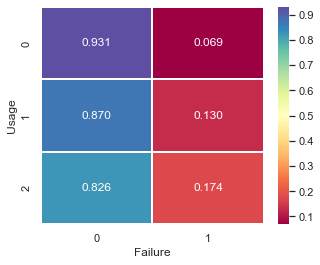

In [34]:
pair = pd.crosstab(df['Usage'], df['Failure'], normalize = 'index')

fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

sns.heatmap(pair, 
            cmap = "Spectral",  
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')
plt.show()

From the heatmap, the higher the usage, the more likely it is to fail. In fact, vehicles with medium usage are twice as likely to fail as compared to vehicles with low usage.

## 4f. Processing the 'Membership' column

Let us now examine the missing values in the 'Membership' column. I will first encode the missing values as 'NIL' and compare the failure rates across all four categories.

In [35]:
df['Membership'].unique()

array(['Normal', 'Premium', None, 'None'], dtype=object)

In [36]:
df['Membership'].fillna('NIL', inplace = True)
df['Membership'].value_counts()

Normal     4483
Premium    3416
None       1718
NIL         383
Name: Membership, dtype: int64

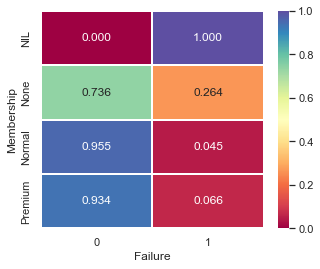

In [37]:
pair = pd.crosstab(df['Membership'], df['Failure'], normalize = 'index')

fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

sns.heatmap(pair, 
            cmap = "Spectral",  
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')
plt.show()

It is observed that those with missing membership values all have faults in their cars, so the lack of membership value itself is a strong indicator for car fault and should not be dropped or imputed. Moreover, those with missing membership values account for 383 out of 1262 cars with failures! This accounts for approximately 30% of the cars with failures which is too significant to drop or place them in any other categories!

Hence I will perform ordinal encoding by mapping 'NIL' to -1 (to penalise it), 'None' to 0, 'Normal' to 1 and 'Premium' to 2.

It is also worthy to note that cars with no membership are 5 to 6 times more likely to fail as compared to those with membership.

In [38]:
encoder = ce.OrdinalEncoder(cols = ['Membership'],
                           return_df = True,
                           mapping = [{'col': 'Membership', 
                                       'mapping':{'NIL': -1, 
                                                  'None': 0, 
                                                  'Normal': 1, 
                                                  'Premium': 2}}])

df['Membership'] = encoder.fit_transform(df['Membership']).astype('int8')

df['Membership'].value_counts().sort_index()

-1     383
 0    1718
 1    4483
 2    3416
Name: Membership, dtype: int64

## 4g. Rearrangement of columns

Let's move the target variable 'Failure' to the last column.

In [39]:
df.columns

Index(['Color', 'Temperature_Celsius', 'RPM', 'Usage', 'Fuel consumption',
       'Membership', 'Failure', 'Model No', 'Years in Market',
       'State of Production', 'Country of Production'],
      dtype='object')

In [40]:
df = df[['Color', 'Temperature_Celsius', 'RPM', 'Usage', 'Fuel consumption',
       'Membership', 'Model No', 'Years in Market',
       'State of Production', 'Country of Production', 'Failure']]

df.head()

,Color,Temperature_Celsius,RPM,Usage,Fuel consumption,Membership,Model No,Years in Market,State of Production,Country of Production,Failure
0,1,110.3,1551,1,659.7,1,1,1,0,0,0
1,0,110.4,1408,1,705.3,2,0,1,0,0,1
2,2,110.3,1498,0,670.7,2,0,1,0,0,0
3,0,110.4,1433,2,630.6,2,0,1,0,1,1
4,3,230.7,1408,2,660.9,1,0,1,0,2,1


## 5. Statstical Analysis of the Continuous Variables

Let us now look at the distributions of 'Temperature_Celsius', 'RPM' and 'Fuel consumption'.

In [41]:
df.describe()[['Temperature_Celsius', 'RPM', 'Fuel consumption']].T

,count,mean,std,min,25%,50%,75%,max
Temperature_Celsius,10000.0,139.70081,50.813614,110.0,110.600,112.2,125.4,278.2
RPM,10000.0,1470.97010,486.047372,-2636.0,1418.000,1499.0,1609.0,2886.0
Fuel consumption,10000.0,679.45699,58.439696,598.5,638.875,668.5,704.2,904.8


## 5a. RPM

Some of the RPM values are negative. Let's isolate them and observe if there are any significant differences in the failure rates between those with negative RPM values and those with positive RPM values.

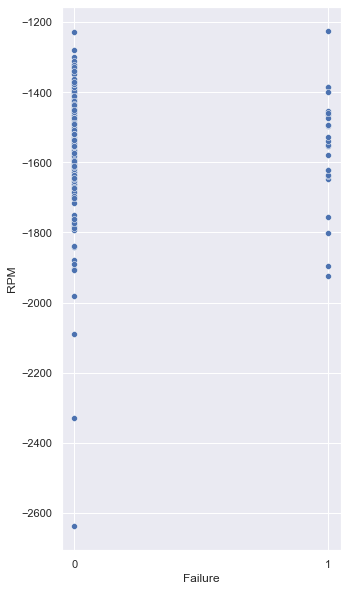

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'RPM', 
                data = df[df['RPM'] < 0], 
                ax = ax)

ax.set_xticks(range(2))
plt.show()

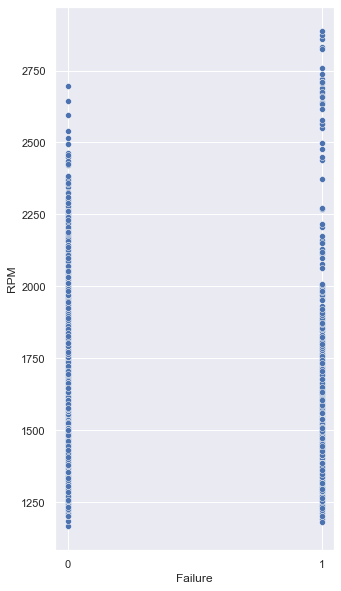

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'RPM', 
                data = df[df['RPM'] > 0], 
                ax = ax)

ax.set_xticks(range(2))
plt.show()

In [44]:
df.query('RPM < 0')['Failure'].value_counts(normalize = True)

0    0.886364
1    0.113636
Name: Failure, dtype: float64

In [45]:
df.query('RPM > 0')['Failure'].value_counts(normalize = True)

0    0.873517
1    0.126483
Name: Failure, dtype: float64

As torque speed is positive, it is not possible for 'RPM' which measures 'Average 30 days maximum torque speed at maximum torque before failure detected' to be negative. <br>
Moreover, there are no significant difference in the failure rates across the two categories. <br>
Hence, I will assume that the negative values are due to human errors and return the absolute values of RPM.

In [46]:
df['RPM'] = abs(df['RPM'])

In [47]:
df.describe()[['Temperature_Celsius', 'RPM', 'Fuel consumption']].T

,count,mean,std,min,25%,50%,75%,max
Temperature_Celsius,10000.0,139.70081,50.813614,110.0,110.600,112.2,125.4,278.2
RPM,10000.0,1538.77610,179.284096,1168.0,1423.000,1503.0,1612.0,2886.0
Fuel consumption,10000.0,679.45699,58.439696,598.5,638.875,668.5,704.2,904.8


Let us now look at the boxplot distribution of 'RPM'. The boxplot shows that it has a long right tail.

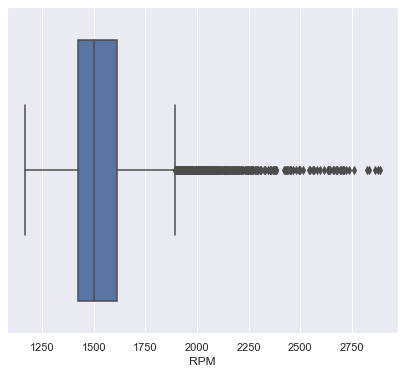

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
sns.boxplot(x = df['RPM'])
plt.show()

Let's examine the outliers by comparing the scatterplots of those whose RPM is above the upper threshold and those below the upper threshold.

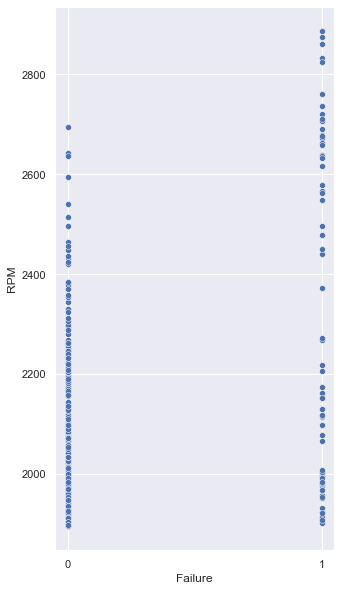

In [49]:
rpm_iqr = df['RPM'].quantile(0.75) - df['RPM'].quantile(0.25)
rpm_upper_threshold = df['RPM'].quantile(0.75) + 1.5 * rpm_iqr

fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'RPM', 
                data = df[df['RPM'] > rpm_upper_threshold], 
                ax = ax)

ax.set_xticks(range(2))
plt.show()

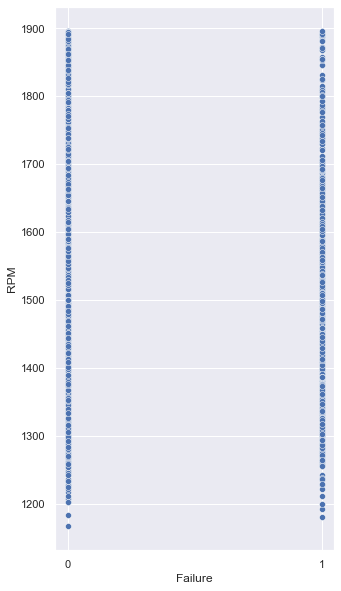

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)
sns.scatterplot(x = 'Failure', y = 'RPM', data = df[df['RPM'] <= rpm_upper_threshold], ax = ax)
ax.set_xticks(range(2))
plt.show()

In [51]:
with pd.option_context("display.max_rows", None):
    display(df[df['RPM'] > rpm_upper_threshold])

,Color,Temperature_Celsius,RPM,Usage,Fuel consumption,Membership,Model No,Years in Market,State of Production,Country of Production,Failure
14,3,110.5,2035,1,640.6,1,0,3,0,0,0
50,3,231.1,2861,2,636.7,0,0,8,0,2,1
70,1,110.6,1924,1,695.9,0,1,11,0,0,0
101,3,110.6,1991,1,680.7,1,0,4,0,0,0
155,2,110.4,1987,0,834.0,2,2,11,0,1,0
172,1,230.6,1924,1,677.3,2,1,2,0,2,0
177,4,110.4,1988,0,637.8,2,0,3,0,0,0
194,2,110.4,2678,0,704.9,-1,1,5,0,0,1
267,0,230.5,1954,1,614.3,2,0,3,0,2,0
284,2,110.4,2051,2,654.9,2,0,5,0,1,0


From the two scatterplots above, vehicles with RPM above 2600 tend to fail.


## 5b. Temperature_Celsius

Let us now examine the 'Temperature_Celsius' variable.

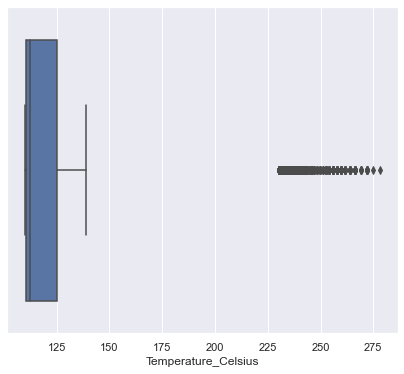

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
sns.boxplot(x = df['Temperature_Celsius'])
plt.show()

In [53]:
temp_iqr = df['Temperature_Celsius'].quantile(0.75) - df['Temperature_Celsius'].quantile(0.25)
temp_upper_threshold = df['Temperature_Celsius'].quantile(0.75) + 1.5 * temp_iqr
temp_upper_threshold

147.60000000000002

In [54]:
with pd.option_context("display.max_rows", None):
    display(df[df['Temperature_Celsius'] > temp_upper_threshold])

,Color,Temperature_Celsius,RPM,Usage,Fuel consumption,Membership,Model No,Years in Market,State of Production,Country of Production,Failure
4,3,230.7,1408,2,660.9,1,0,1,0,2,1
10,3,230.8,1782,2,849.5,2,2,2,0,2,0
11,3,230.9,1423,0,801.8,1,2,2,0,2,0
17,4,230.9,1410,2,742.4,1,1,3,0,2,0
24,3,231.1,1561,0,675.5,2,1,5,0,2,1
29,3,231.1,1693,1,645.4,2,0,5,0,2,0
30,4,231.2,1339,2,677.7,-1,1,5,0,2,1
33,3,231.1,1665,1,641.9,2,0,6,0,2,0
36,4,231.1,1581,2,731.4,0,1,6,0,2,0
43,0,231.0,1372,0,789.9,0,2,7,0,2,0


From the boxplot, it seems that there are no values between 147.7 to 225 and then suddenly there are some outlier values greater than 225. Let us examine these outlier values by comparing the scatterplots of those whose temperature is above the upper threshold and those below the upper threshold.

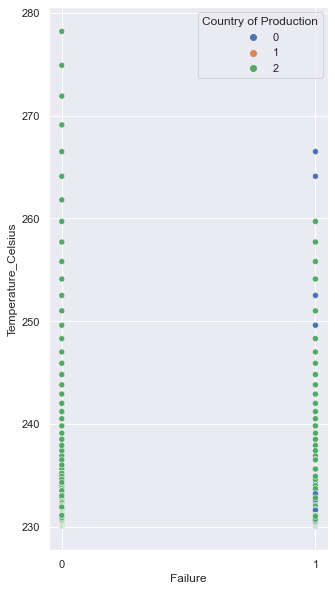

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'Temperature_Celsius', 
                hue = 'Country of Production', 
                data = df[df['Temperature_Celsius'] > temp_upper_threshold],
                ax = ax)

ax.set_xticks(range(2))
plt.show()

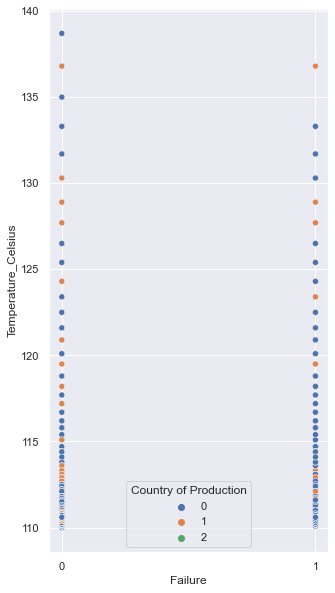

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'Temperature_Celsius', 
                hue = 'Country of Production', 
                data = df[df['Temperature_Celsius'] <= temp_upper_threshold])

ax.set_xticks(range(2))
plt.show()

Combining the two together, we can see the clusters more clearly.

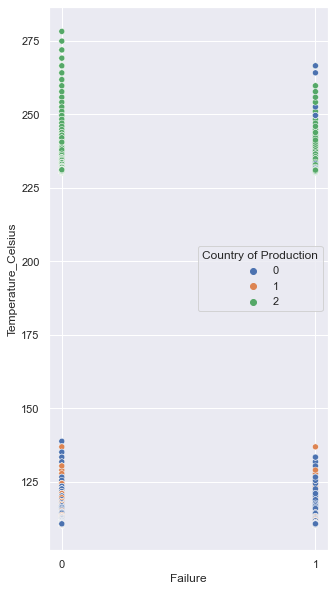

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'Temperature_Celsius', 
                hue = 'Country of Production', 
                data = df)

ax.set_xticks(range(2))
plt.show()

It seems that almost all of the cars with outlier temperature values are manufactured in US! 
Let us verify through aggregation.

In [58]:
df[df['Temperature_Celsius'] > temp_upper_threshold].groupby('Country of Production')['Country of Production'].count()

Country of Production
0      44
1       0
2    2127
Name: Country of Production, dtype: int64

The aggregation confirms my suspicion! 

## 5c. Fuel consumption

Let us now look at the distribution for 'Fuel consumption'. Again from the boxplot, the 'Fuel consumption' variable has an extremely long right tail.

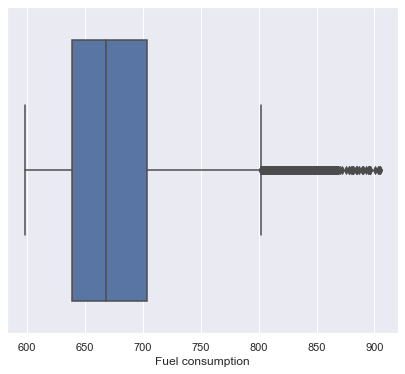

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
sns.boxplot(x = df['Fuel consumption'])
plt.show()

In [60]:
fuel_iqr = df['Fuel consumption'].quantile(0.75) - df['Fuel consumption'].quantile(0.25)
fuel_upper_threshold = df['Fuel consumption'].quantile(0.75) + 1.5 * fuel_iqr
fuel_upper_threshold

802.1875000000001

In [61]:
with pd.option_context("display.max_rows", None):
    display(df[df['Fuel consumption'] > fuel_upper_threshold])

,Color,Temperature_Celsius,RPM,Usage,Fuel consumption,Membership,Model No,Years in Market,State of Production,Country of Production,Failure
10,3,230.8,1782,2,849.5,2,2,2,0,2,0
18,0,110.6,1306,2,892.9,-1,2,3,-1,0,1
38,3,110.6,1379,2,852.0,0,2,6,0,0,1
48,3,231.0,1425,1,848.9,1,2,8,0,2,0
52,2,110.6,1497,0,889.9,0,2,8,0,0,1
67,3,110.6,1466,1,842.7,1,2,10,0,1,0
80,1,110.6,1445,1,841.8,2,2,1,0,0,0
86,3,231.1,1436,1,819.0,1,2,2,0,2,0
108,4,231.1,1621,0,814.3,1,2,5,0,2,0
111,3,110.5,1499,2,804.8,2,2,5,0,1,0


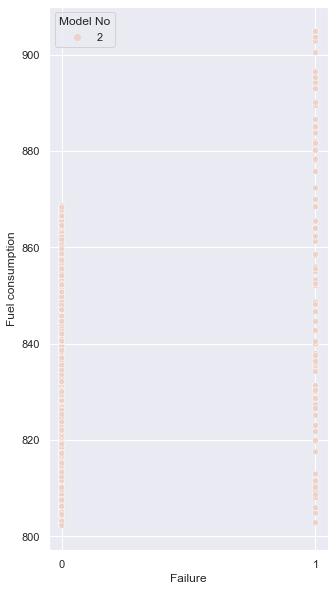

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'Fuel consumption', 
                hue = 'Model No', 
                data = df[df['Fuel consumption'] > fuel_upper_threshold])

ax.set_xticks(range(2))
plt.show()

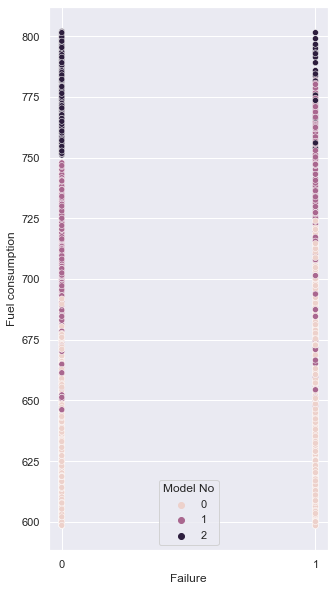

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'Fuel consumption', 
                hue = 'Model No', 
                data = df[df['Fuel consumption'] <= fuel_upper_threshold])

ax.set_xticks(range(2))
plt.show()

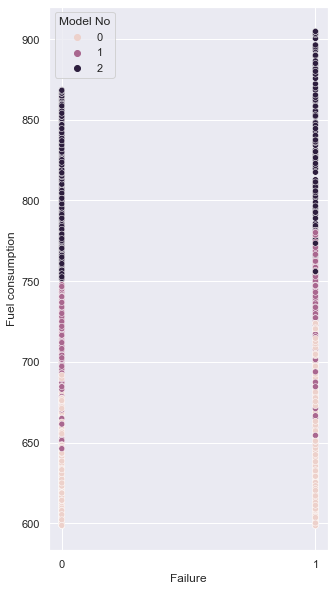

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)

sns.scatterplot(x = 'Failure', 
                y = 'Fuel consumption', 
                hue = 'Model No', 
                data = df)

ax.set_xticks(range(2))
plt.show()

From the two scatterplots (especially the bands in the second scatterplots), it is observed generally that Model 0 (original: Model 3) uses the least fuel, followed by Model 1 (original: Model 5) and then Model 2 (original: Model 7). The outlier values are all from cars of Model 2 (original: Model 7).

This may mean that 'Model No' and 'Fuel consumption' are highly correlated. Let's confirm this with a heatmap with correlation matrix!

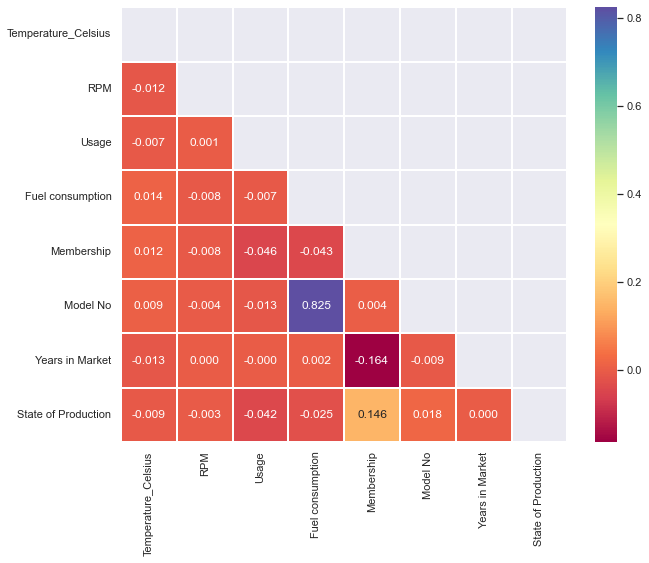

In [65]:
corr =  df.corr()
matrix = np.triu(corr)

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(corr, 
            cmap = "Spectral", 
            mask = matrix, 
            linewidths = 0.1, 
            annot = True, 
            fmt = '.3f')

plt.show()

The heatmap confirms my suspicion since 'Model No' and 'Fuel consumption' have a strong linear correlation of correlation value 0.825. 

## 6. Principal Component Analysis (PCA)

Since 'Model No' and 'Fuel consumption' are highly correlated, let us now explore how many of the features will contribute to the bulk of the variance in the data using Principal Component Analysis (PCA).

In [66]:
X = df.loc[:, df.columns != 'Failure']
y = df['Failure']

In [67]:
pipe = Pipeline([('scaler', StandardScaler()),        
                 ('reducer', PCA())])
pipe.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('reducer', PCA())])

In [68]:
var_ratio = pipe['reducer'].explained_variance_ratio_
print(var_ratio)

[0.18596242 0.18210335 0.12298326 0.10307004 0.09995725 0.09979937
 0.09618488 0.07796439 0.01730005 0.01467499]


In [69]:
print(var_ratio.cumsum())

[0.18596242 0.36806577 0.49104903 0.59411907 0.69407632 0.7938757
 0.89006057 0.96802496 0.98532501 1.        ]


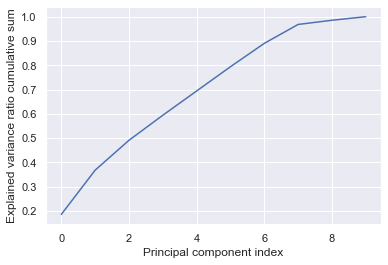

In [70]:
plt.plot(var_ratio.cumsum())
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio cumulative sum')
plt.show()

As shown in the values and the plot (through the elbow at the seventh principal component index) above, we only need 8 of the 10 features to account for 96.8% of the data! 
As such, in the subsequent creation of the machine learning pipeline, I will place PCA in the pipeline and let n_components = 8.

This marks the end of my exploratory data analysis.